In [1]:
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
 url = "https://ev-database.org/#group=vehicle-group&rs-pr=10000_100000&rs-er=0_1000&rs-ld=0_1000&rs-ac=2_23&rs-dcfc=0_400&rs-ub=10_200&rs-tw=0_2500&rs-ef=100_350&rs-sa=-1_5&rs-w=1000_3500&rs-c=0_5000&rs-y=2010_2030&s=1&p=0-10"

In [3]:
response  = requests.get(url)
response 

<Response [200]>

In [4]:
response.text[1:100]

'<!doctype html>\n\n<html lang="en" data-locale="en-IE" data-region="si">\n\t<!-- head -->\n\t<head>\t\t\n\t<m'

In [5]:
pc = response.text

In [6]:
soup = BeautifulSoup(pc)

In [7]:
headers = {"User-Agent": "Mozilla/5.0"}

# Key labels and regex patterns
FIELDS = {
    'Range': r'(\d+\.?\d*)\s*km',
    'Efficiency': r'(\d+\.?\d*)\s*Wh/km',
    'Weight': r'(\d+\.?\d*)\s*kg',
    '0-100': r'(\d+\.?\d*)\s*s',
    '1-Stop Range': r'(\d+\.?\d*)\s*km',
    'Battery': r'(\d+\.?\d*)\s*kWh',
    'Fastcharge': r'(\d+\.?\d*)\s*kW',
    'Towing': r'(\d+\.?\d*)\s*kg',
    'Cargo Vol.': r'(\d+\.?\d*)\s*L',
    'Price/range': r'€?(\d+\.?\d*)'
}

cars = []

for page in range(1, 51):
    print(f"Scraping page {page}...")
    url = f'https://ev-database.org/?page={page}'
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')

    for item in soup.select('.list-item'):
        model = item.select_one('.title')
        model = model.get_text(strip=True).split('(')[0] if model else 'N/A'

        # Collect all text in item-data block
        specs_text = item.select_one('.item-data')
        specs_text = specs_text.get_text(separator=' ', strip=True) if specs_text else ''
        
        data = {'Model': model}
        for label, pattern in FIELDS.items():
            match = re.search(pattern, specs_text)
            data[label] = match.group(1) if match else None

        cars.append(data)

# Create DataFrame
df = pd.DataFrame(cars)
df.to_csv('clean_ev.csv', index=False)

print(f"\n Scraped {len(df)} EVs successfully!")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...

 Scraped

In [8]:
df = pd.read_csv("clean_ev.csv")

In [9]:
df

,Model,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Cargo Vol.,Price/range
0,BMWiX3 50 xDrive,610,178,2360,4.9,610,108.7,108.7,2360,2,3.0
1,MGMG4 Electric 64 kWhMG MG4 Electric 64 kWh,360,171,1726,7.9,360,64.0,64.0,1726,2,4.0
2,Mercedes-BenzCLA 250+Mercedes-Benz CLA 250+,585,145,2055,6.7,585,85.0,85.0,2055,2,250.0
3,BMWiX xDrive40BMW iX xDrive40,360,197,2440,6.1,360,71.0,71.0,2440,2,40.0
4,Fiat500e Hatchback 42 kWhFiat 500e Hatchback 4...,235,159,1365,9.0,235,42.0,42.0,1365,2,500.0
...,...,...,...,...,...,...,...,...,...,...,...
57295,Citroënë-Jumpy Combi XS 50 kWhCitroen e-Jumpy ...,185,250,1932,12.1,185,50.0,50.0,1932,2,50.0
57296,OpelVivaro-e Combi M 50 kWhOpel Vivaro-e Combi...,185,250,1969,12.1,185,50.0,50.0,1969,2,50.0
57297,Peugeote-Expert Combi Compact 50 kWhPeugeot e-...,185,250,1932,12.1,185,50.0,50.0,1932,2,50.0
57298,LucidAir Touring,605,159,2337,3.6,605,96.0,96.0,2337,2,25.0


In [10]:
df.head(10)

,Model,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Cargo Vol.,Price/range
0,BMWiX3 50 xDrive,610,178,2360,4.9,610,108.7,108.7,2360,2,3.0
1,MGMG4 Electric 64 kWhMG MG4 Electric 64 kWh,360,171,1726,7.9,360,64.0,64.0,1726,2,4.0
2,Mercedes-BenzCLA 250+Mercedes-Benz CLA 250+,585,145,2055,6.7,585,85.0,85.0,2055,2,250.0
3,BMWiX xDrive40BMW iX xDrive40,360,197,2440,6.1,360,71.0,71.0,2440,2,40.0
4,Fiat500e Hatchback 42 kWhFiat 500e Hatchback 4...,235,159,1365,9.0,235,42.0,42.0,1365,2,500.0
5,CUPRABorn 150 kW - 58 kWhCUPRA Born 150 kW - 5...,350,166,1811,7.3,350,58.0,150.0,1811,2,150.0
6,TeslaModel Y Long Range AWD,455,165,2072,4.8,455,75.0,75.0,2072,2,2025.0
7,TeslaModel 3 Long Range RWD,580,136,1822,5.2,580,79.0,79.0,1822,3,3.0
8,CUPRABorn 170 kW - 77 kWhCUPRA Born 170 kW - 7...,450,171,1946,7.0,450,77.0,170.0,1946,2,170.0
9,KiaEV3 Long RangeKia EV3 Long Range,455,171,1885,7.7,455,78.0,78.0,1885,3,3.0


In [12]:
known_brands = [
    'BMW', 'MG', 'Mercedes-Benz', 'Fiat', 'CUPRA', 'Tesla', 'Kia', 'Ford',
    'Polestar', 'Volkswagen', 'Porsche', 'Audi', 'Hyundai', 'Nissan',
    'Renault', 'Skoda', 'Volvo', 'Mazda', 'Toyota', 'Jaguar', 'BYD', 'Leapmotor',
    'Škoda', 'Mini', 'Lucid', 'Citroën', 'Peugeot', 'XPENG', 'Smart', 'Opel',
    'Rolls-Royce', 'Jeep', 'NIO', 'Lexus', 'Maserati', 'Genesis', 'Lotus',
    'Zeekr', 'Changan', 'Dongfeng', 'KGM', 'Lynk&Co', 'TOGG', 'Omoda',
    'Dacia', 'Hongqi', 'Jaecoo', 'Geely', 'Honda', 'GWM', 'Alpine',
    'Mitsubishi', 'Maxus', 'Suzuki', 'DS', 'Cadillac', 'Subaru', 'Abarth',
    'Voyah', 'Fisker', 'Lightyear', 'SEAT', 'VinFast', 'e.GO', 'SEAT',
    'SsangYong', 'Skywell', 'JAC', 'Sono', 'Aiways', 'Elaris', 'ORA'
]
brand_regex = r'(' + '|'.join(re.escape(b) for b in known_brands) + r')'
extraction_pattern = brand_regex + r'(.*)$'
extracted = df['Model'].str.extract(extraction_pattern, flags=re.IGNORECASE, expand=True)
df['Brand'] = extracted[0].str.strip()
df['Model_Details_Raw'] = extracted[1].str.strip()

def clean_model_name(row):
    raw_details = row['Model_Details_Raw']
    brand = row['Brand']

    if pd.isna(raw_details) or not raw_details:
        return raw_details
    brand_rep_pattern = re.escape(brand)
    match = re.search(brand_rep_pattern, raw_details, flags=re.IGNORECASE)
    
    if match and match.start() > 1:
        return raw_details[:match.start()].strip()
    return raw_details.strip()

df['Model Name'] = df.apply(clean_model_name, axis=1)
df = df.drop(columns=['Model_Details_Raw'])

In [14]:
df.isnull().sum()

Model             0
Range             0
Efficiency        0
Weight            0
0-100             0
1-Stop Range      0
Battery           0
Fastcharge        0
Towing            0
Cargo Vol.        0
Price/range       0
Brand           300
Model Name      300
dtype: int64

In [15]:
df["Brand"].fillna(df["Brand"].mode()[0], inplace=True)

In [16]:
df["Model Name"].fillna(df["Model Name"].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

Model           0
Range           0
Efficiency      0
Weight          0
0-100           0
1-Stop Range    0
Battery         0
Fastcharge      0
Towing          0
Cargo Vol.      0
Price/range     0
Brand           0
Model Name      0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(56196)

In [19]:
df.drop_duplicates(subset=["Model"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.head()

,Model,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Cargo Vol.,Price/range,Brand,Model Name
0,BMWiX3 50 xDrive,610,178,2360,4.9,610,108.7,108.7,2360,2,3.0,BMW,iX3 50 xDrive
1,MGMG4 Electric 64 kWhMG MG4 Electric 64 kWh,360,171,1726,7.9,360,64.0,64.0,1726,2,4.0,MG,MG4 Electric 64 kWhMG MG4 Electric 64 kWh
2,Mercedes-BenzCLA 250+Mercedes-Benz CLA 250+,585,145,2055,6.7,585,85.0,85.0,2055,2,250.0,Mercedes-Benz,CLA 250+
3,BMWiX xDrive40BMW iX xDrive40,360,197,2440,6.1,360,71.0,71.0,2440,2,40.0,BMW,iX xDrive40
4,Fiat500e Hatchback 42 kWhFiat 500e Hatchback 4...,235,159,1365,9.0,235,42.0,42.0,1365,2,500.0,Fiat,500e Hatchback 42 kWh


In [23]:
df.drop(['Model', 'Cargo Vol.', ], axis=1, inplace=True)

In [24]:
df.head()

,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Price/range,Brand,Model Name
0,610,178,2360,4.9,610,108.7,108.7,2360,3.0,BMW,iX3 50 xDrive
1,360,171,1726,7.9,360,64.0,64.0,1726,4.0,MG,MG4 Electric 64 kWhMG MG4 Electric 64 kWh
2,585,145,2055,6.7,585,85.0,85.0,2055,250.0,Mercedes-Benz,CLA 250+
3,360,197,2440,6.1,360,71.0,71.0,2440,40.0,BMW,iX xDrive40
4,235,159,1365,9.0,235,42.0,42.0,1365,500.0,Fiat,500e Hatchback 42 kWh


In [25]:
cols = ['Range','Efficiency','Weight','0-100','1-Stop Range','Battery','Fastcharge','Towing','Price/range']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [26]:
df.to_csv("ev_dataset_clean.csv", index=False)

In [27]:
df1 = pd.read_csv("ev_dataset_clean.csv")

In [28]:
df1

,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Price/range,Brand,Model Name
0,610,178,2360,4.9,610,108.7,108.7,2360,3.0,BMW,iX3 50 xDrive
1,360,171,1726,7.9,360,64.0,64.0,1726,4.0,MG,MG4 Electric 64 kWhMG MG4 Electric 64 kWh
2,585,145,2055,6.7,585,85.0,85.0,2055,250.0,Mercedes-Benz,CLA 250+
3,360,197,2440,6.1,360,71.0,71.0,2440,40.0,BMW,iX xDrive40
4,235,159,1365,9.0,235,42.0,42.0,1365,500.0,Fiat,500e Hatchback 42 kWh
...,...,...,...,...,...,...,...,...,...,...,...
837,185,250,1932,12.1,185,50.0,50.0,1932,50.0,Peugeot,e-Traveller Compact 50 kWh
838,185,250,1932,12.1,185,50.0,50.0,1932,50.0,Citroën,ë-Jumpy Combi XS 50 kWhCitroen e-Jumpy Combi X...
839,185,250,1969,12.1,185,50.0,50.0,1969,50.0,Opel,Vivaro-e Combi M 50 kWh
840,185,250,1932,12.1,185,50.0,50.0,1932,50.0,Peugeot,e-Expert Combi Compact 50 kWh


In [29]:
df1["Brand"].isnull().sum()

np.int64(0)

### EDA

In [30]:
df1.describe()

,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Price/range
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,367.131829,192.332542,2083.665083,7.352613,367.131829,70.608670,73.204869,2083.665083,430.264608
std,112.461902,29.998947,369.640587,3.127683,112.461902,21.469387,26.725219,369.640587,804.009688
min,85.000000,109.000000,1009.000000,1.000000,85.000000,14.500000,14.500000,1009.000000,0.000000
25%,285.000000,170.000000,1840.250000,4.900000,285.000000,54.000000,54.000000,1840.250000,5.000000
50%,375.000000,185.500000,2123.500000,6.900000,375.000000,74.000000,75.000000,2123.500000,45.000000
75%,455.000000,206.000000,2344.500000,9.000000,455.000000,85.000000,87.000000,2344.500000,297.500000
max,720.000000,295.000000,3085.000000,22.400000,720.000000,123.000000,210.000000,3085.000000,5008.000000


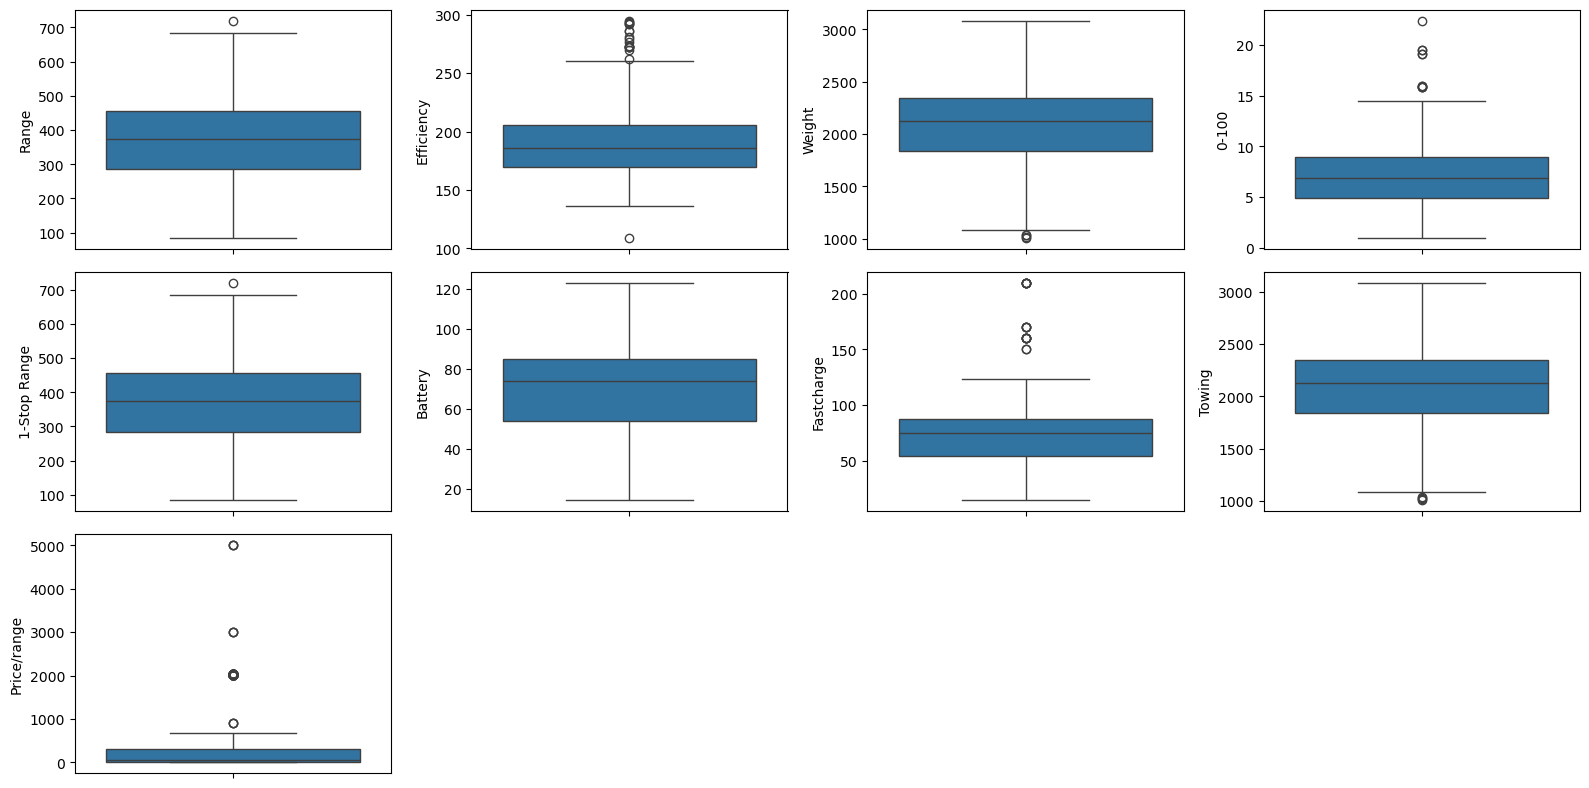

In [41]:
fig, ax = plt.subplots(3, 4, figsize=(16, 8))
ax_flat = ax.flatten()
columns_to_plot = [
    'Range', 'Efficiency', 'Weight', '0-100', '1-Stop Range', 
    'Battery', 'Fastcharge', 'Towing', 'Price/range', 
]
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df1, y=col, ax=ax_flat[i])
ax_flat[9].remove()
ax_flat[10].remove()
ax_flat[11].remove()
plt.tight_layout()
plt.show()

In [44]:
import numpy as np
import pandas as pd

# Assuming your DataFrame is named df1

def cap_outliers_iqr(df, column):
    """
    Handles outliers in a specified column of a DataFrame using the 
    Interquartile Range (IQR) method (Capping/Winsorization).
    """
    # 1. Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Define the outlier boundaries (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# --- List of Columns to Process ---
numerical_cols = [
    'Range', 
    'Efficiency', 
    'Weight', 
    '0-100', 
    '1-Stop Range',
    'Battery', 
    'Fastcharge', 
    'Towing',
    'Price/range' # Assuming the last plot is 'Price/range'
]

for col in numerical_cols:
    # Check if the column exists and is numerical before processing
    if col in df1.columns and pd.api.types.is_numeric_dtype(df1[col]):
        df1 = cap_outliers_iqr(df1, col)
        print(f" Outliers capped successfully for column: {col}")
    elif col not in df1.columns:
        print(f" Column not found: {col}")
    else:
        print(f" Skipping non-numerical column: {col}")


 Outliers capped successfully for column: Range
 Outliers capped successfully for column: Efficiency
 Outliers capped successfully for column: Weight
 Outliers capped successfully for column: 0-100
 Outliers capped successfully for column: 1-Stop Range
 Outliers capped successfully for column: Battery
 Outliers capped successfully for column: Fastcharge
 Outliers capped successfully for column: Towing
 Outliers capped successfully for column: Price/range


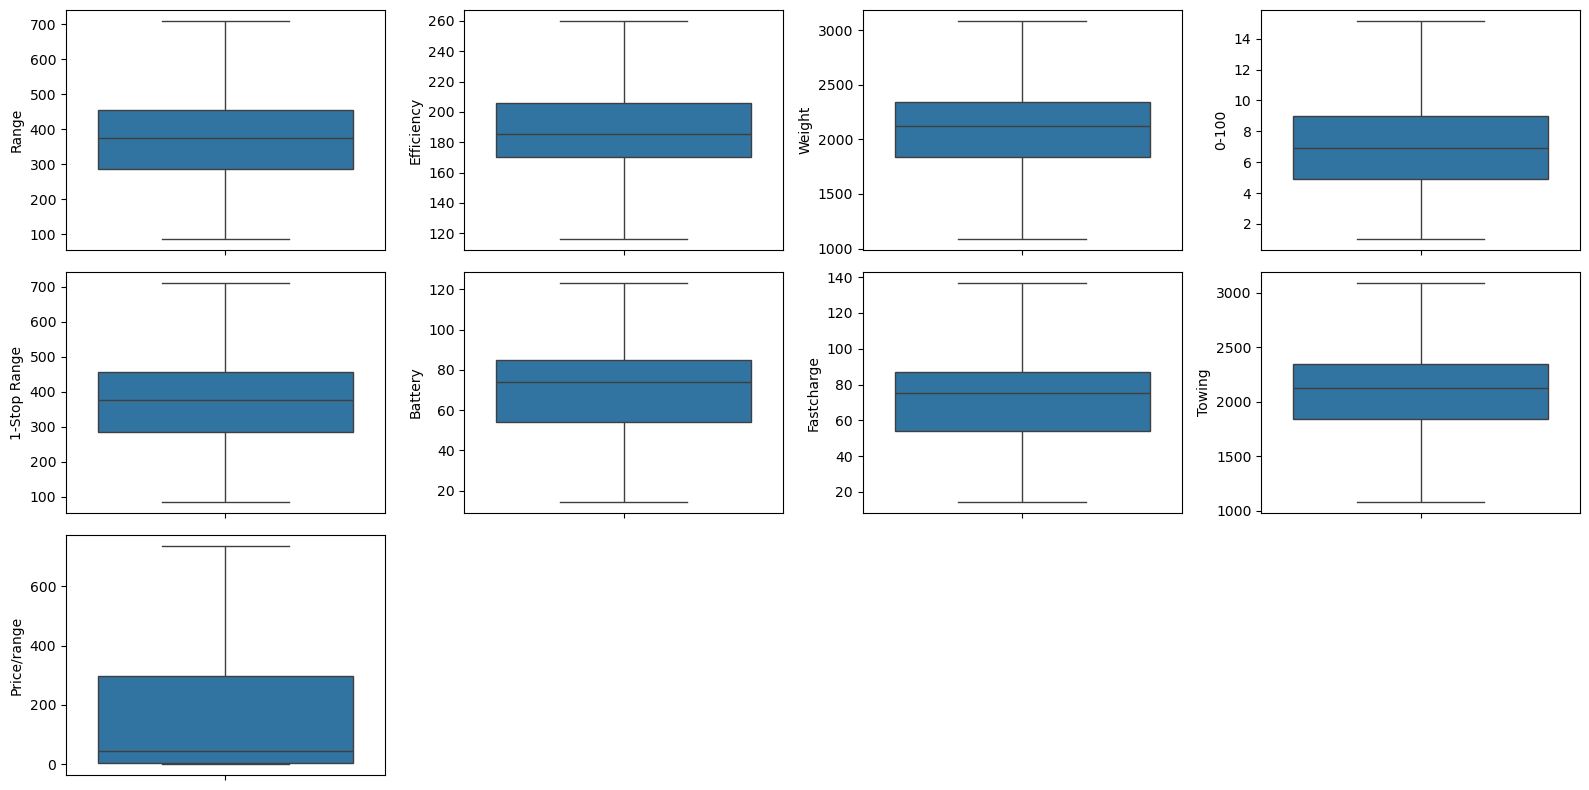

In [45]:
fig, ax = plt.subplots(3, 4, figsize=(16, 8))
ax_flat = ax.flatten()
columns_to_plot = [
    'Range', 'Efficiency', 'Weight', '0-100', '1-Stop Range', 
    'Battery', 'Fastcharge', 'Towing', 'Price/range', 
]
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df1, y=col, ax=ax_flat[i])
ax_flat[9].remove()
ax_flat[10].remove()
ax_flat[11].remove()
plt.tight_layout()
plt.show()

In [73]:
print("Missing values after cleaning:")
print(df1.isnull().sum())

Missing values after cleaning:
Range           0
Efficiency      0
Weight          0
0-100           0
1-Stop Range    0
Battery         0
Fastcharge      0
Towing          0
Price/range     0
Brand           0
Model Name      0
dtype: int64


In [74]:
numerical_cols_to_check = ['Range', 'Efficiency', 'Weight', '0-100', 'Battery', 'Fastcharge', 'Towing', 'Price/range']

for col in numerical_cols_to_check:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    
# Convert object columns to 'category' type to save memory and prepare for encoding
categorical_cols = ['Brand', 'Model Name'] # After rare category handling

for col in categorical_cols:
    df1[col] = df1[col].astype('category')

In [75]:
if 'Range_Per_kWh' not in df1.columns:
    # Simple division to get km/kWh (or similar unit)
    df1['Range_Per_kWh'] = df1['Range'] / df1['Battery']
    print("✅ Created new feature: Range_Per_kWh")

✅ Created new feature: Range_Per_kWh


In [77]:
df1['Range_Per_kWh'].head()

0    5.611776
1    5.625000
2    6.882353
3    5.070423
4    5.595238
Name: Range_Per_kWh, dtype: float64

In [84]:
# Save the final cleaned DataFrame to a new CSV file
output_file_path = 'final_cleaned_ev_data.csv'
df1.to_csv(output_file_path, index=False)
print(f"\n✨ Final cleaned data saved to: {output_file_path}")


✨ Final cleaned data saved to: final_cleaned_ev_data.csv


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Range          842 non-null    int64   
 1   Efficiency     842 non-null    float64 
 2   Weight         842 non-null    float64 
 3   0-100          842 non-null    float64 
 4   1-Stop Range   842 non-null    int64   
 5   Battery        842 non-null    float64 
 6   Fastcharge     842 non-null    float64 
 7   Towing         842 non-null    float64 
 8   Price/range    842 non-null    float64 
 9   Brand          842 non-null    category
 10  Model Name     842 non-null    category
 11  Range_Per_kWh  842 non-null    float64 
dtypes: category(2), float64(8), int64(2)
memory usage: 109.6 KB


In [79]:
df1.describe()

,Range,Efficiency,Weight,0-100,1-Stop Range,Battery,Fastcharge,Towing,Price/range,Range_Per_kWh
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,367.119952,191.927553,2083.949525,7.319596,367.119952,70.608670,72.322447,2083.949525,189.580226,5.263237
std,112.425115,28.843845,368.845610,3.019517,112.425115,21.469387,23.523735,368.845610,279.938053,0.783933
min,85.000000,116.000000,1083.875000,1.000000,85.000000,14.500000,14.500000,1083.875000,0.000000,2.926829
25%,285.000000,170.000000,1840.250000,4.900000,285.000000,54.000000,54.000000,1840.250000,5.000000,4.856104
50%,375.000000,185.500000,2123.500000,6.900000,375.000000,74.000000,75.000000,2123.500000,45.000000,5.371355
75%,455.000000,206.000000,2344.500000,9.000000,455.000000,85.000000,87.000000,2344.500000,297.500000,5.842176
max,710.000000,260.000000,3085.000000,15.150000,710.000000,123.000000,136.500000,3085.000000,736.250000,9.166667


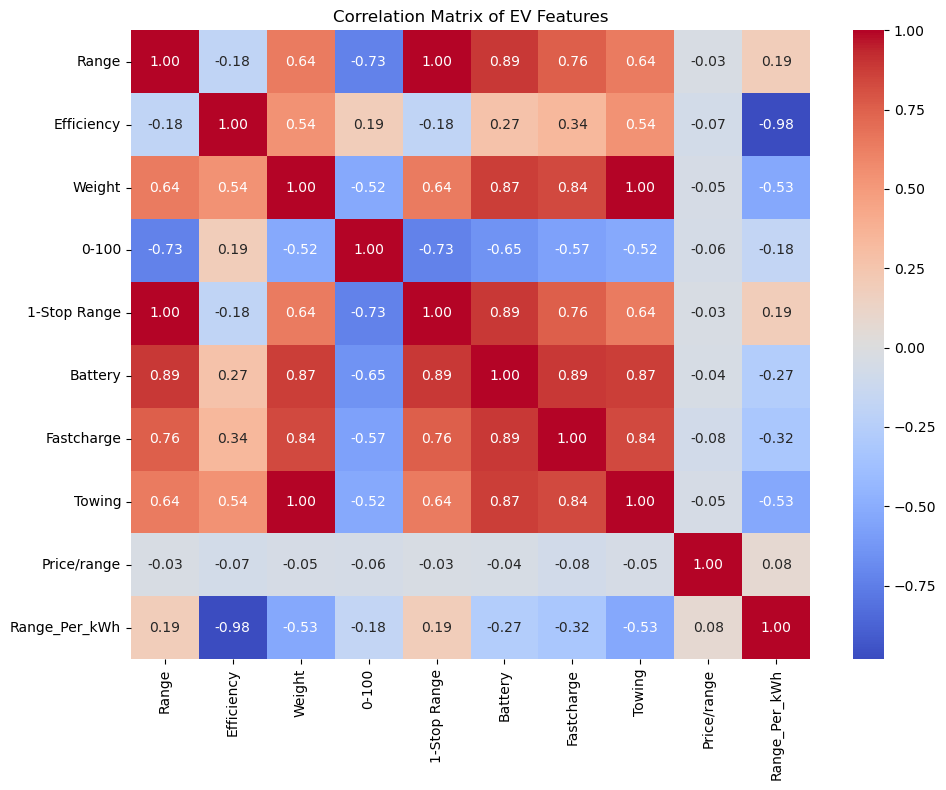

In [83]:
# Visualize correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
corr_matrix = df1.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of EV Features")
plt.tight_layout()
plt.show()

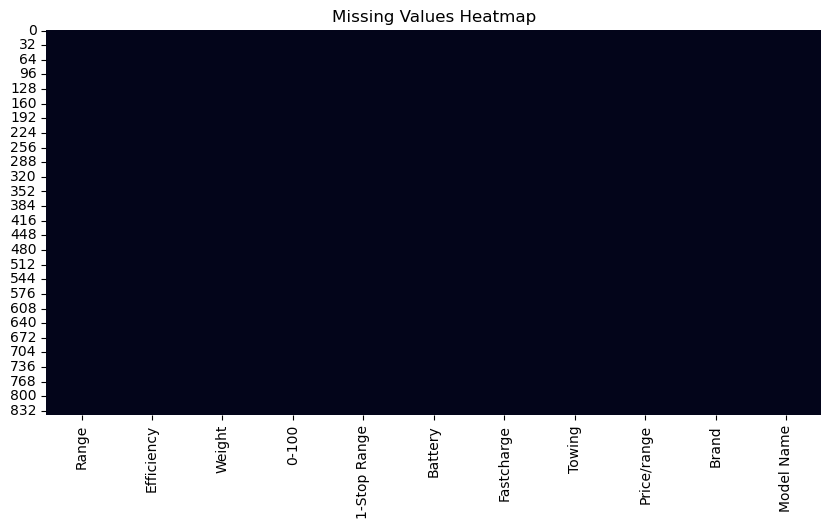

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

##  Numerical Distribution (Univariate)


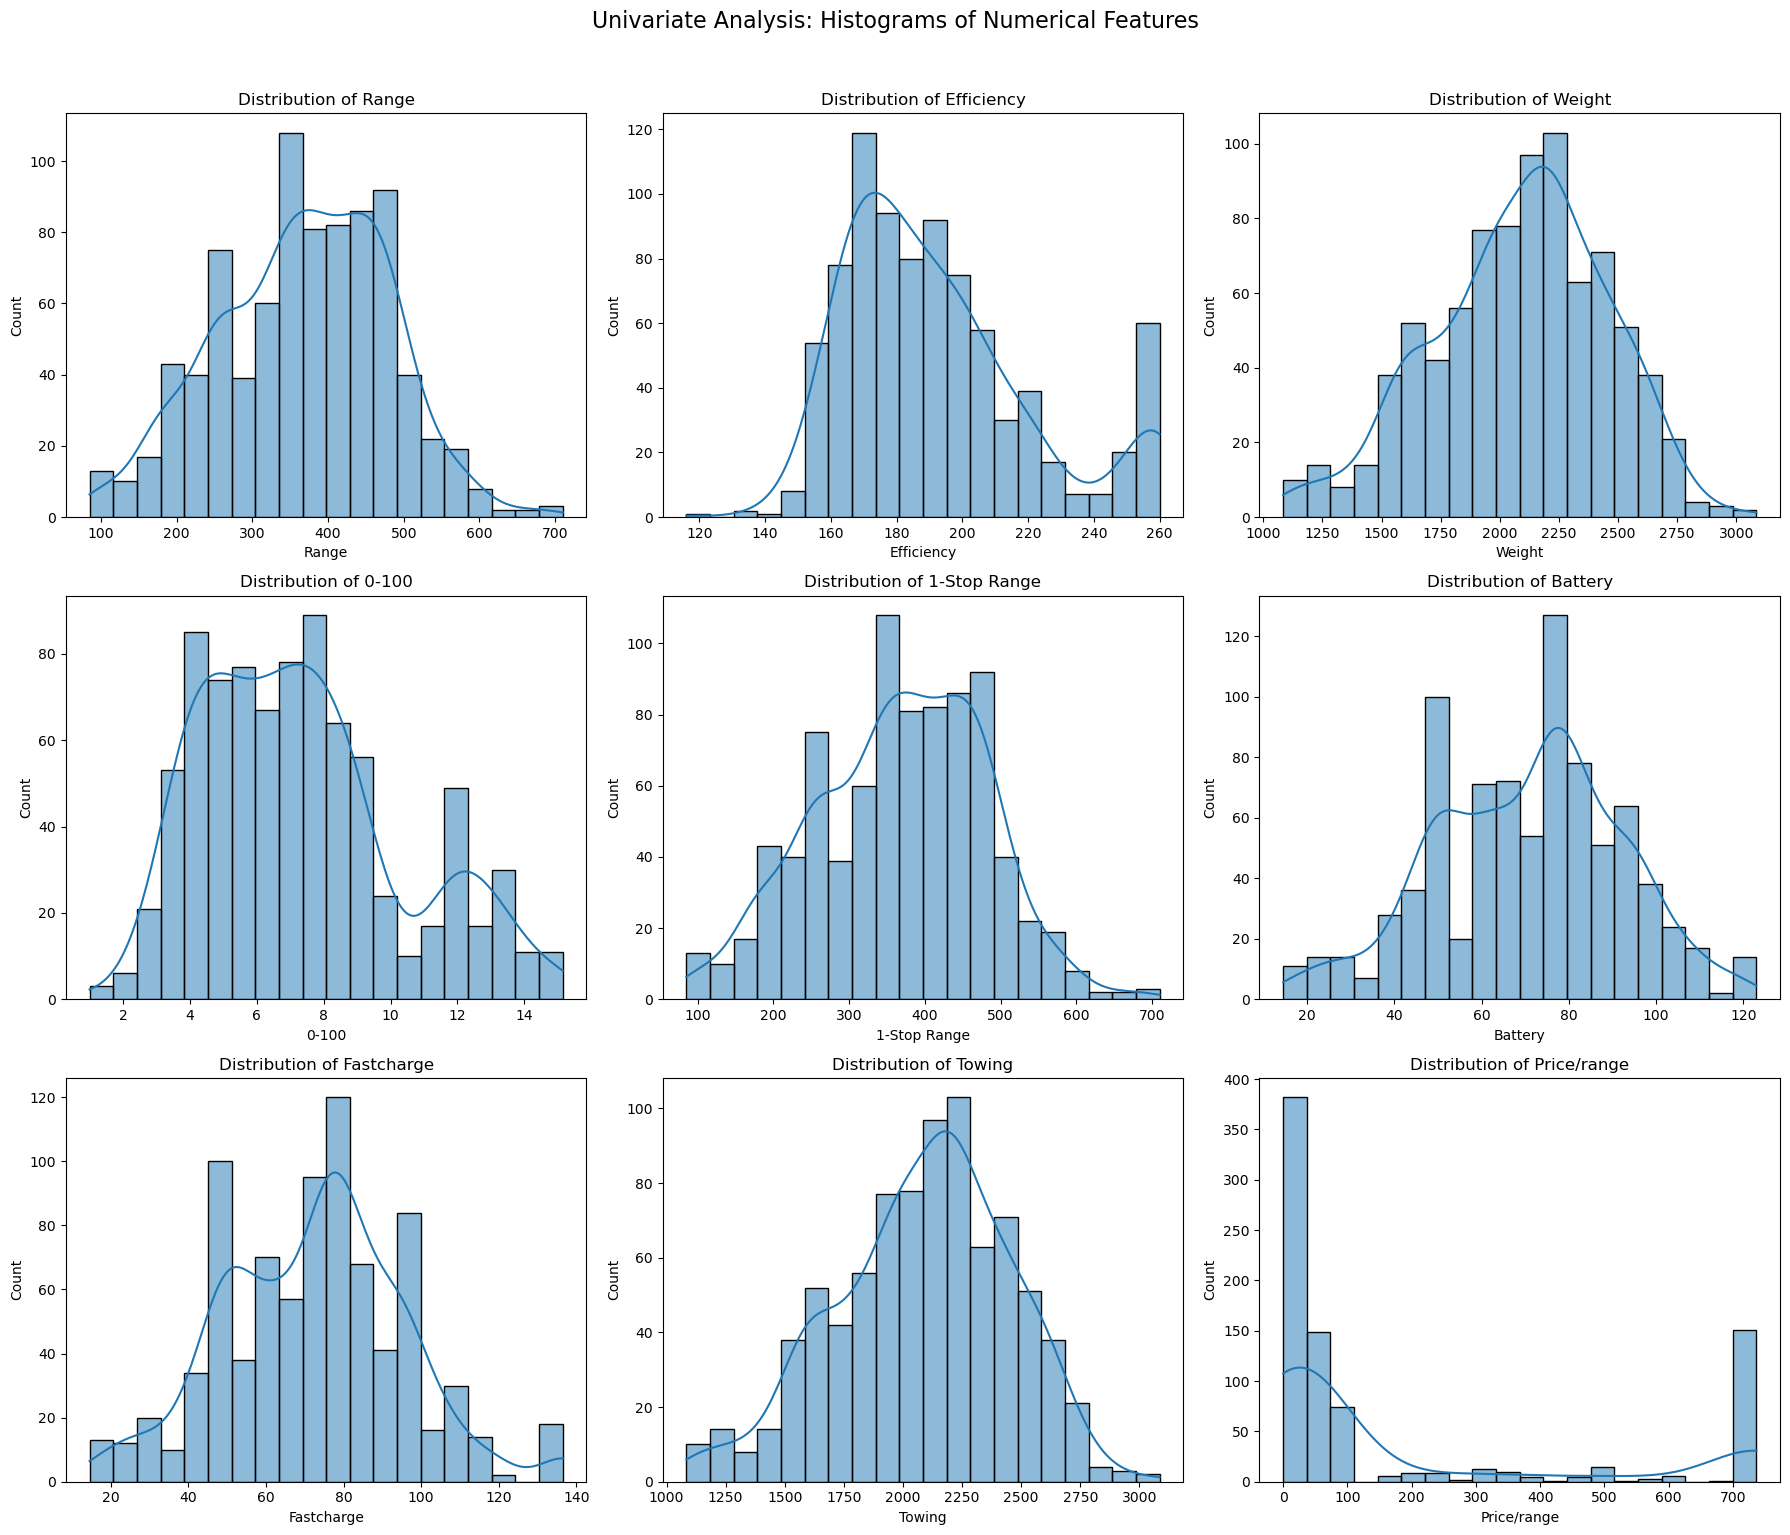

In [85]:
numerical_cols = [
    'Range', 'Efficiency', 'Weight', '0-100', '1-Stop Range', 
    'Battery', 'Fastcharge', 'Towing', 'Price/range'
]

# Create a figure for histograms
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df1[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)

plt.suptitle('Univariate Analysis: Histograms of Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

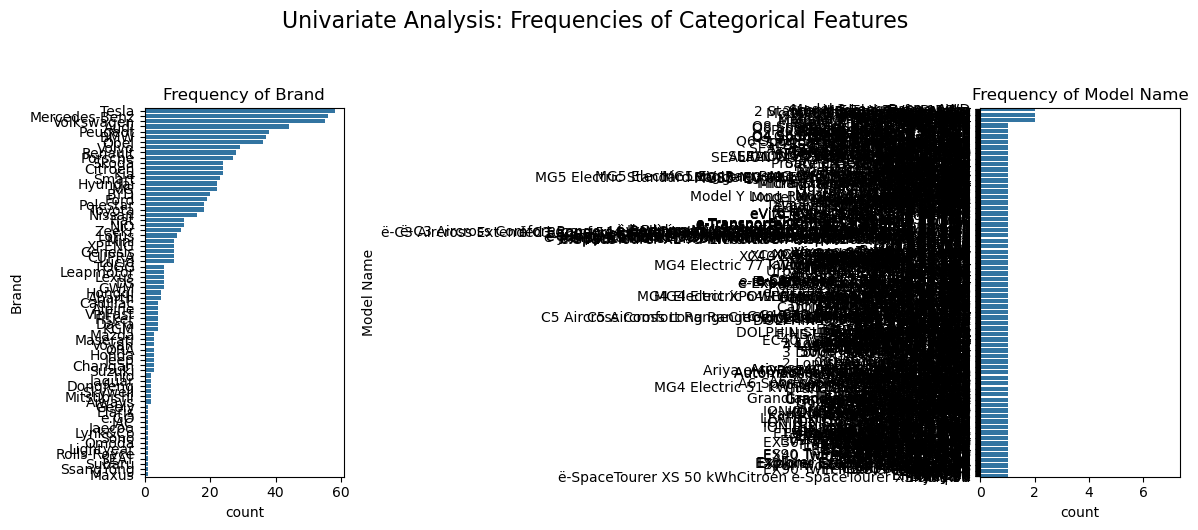

In [86]:
# Create a figure for count plots
categorical_cols = ['Brand', 'Model Name'] # After rare category handling

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df1, y=col, order=df1[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frequency of {col}', fontsize=12)

plt.suptitle('Univariate Analysis: Frequencies of Categorical Features', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### Bivariate Analysis(Numerical vs Numerical)

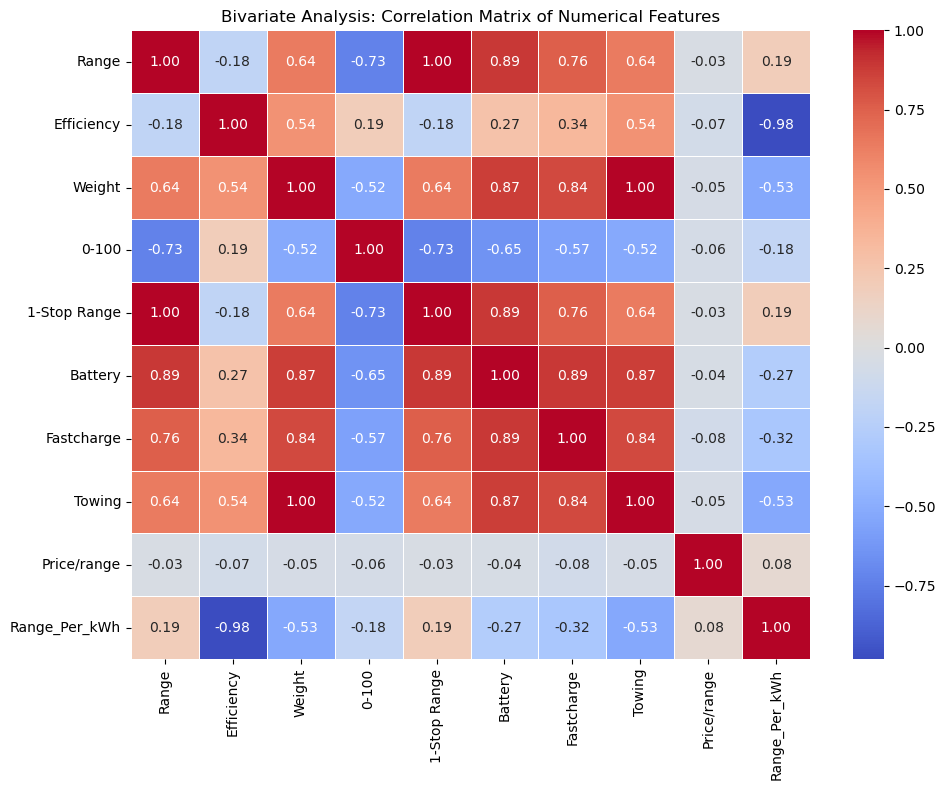

In [87]:
numerical_df = df1.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
# Use a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, 
            annot=True, # Display correlation values on the map
            fmt=".2f",  # Format to two decimal places
            cmap='coolwarm', 
            linewidths=.5)
plt.title('Bivariate Analysis: Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

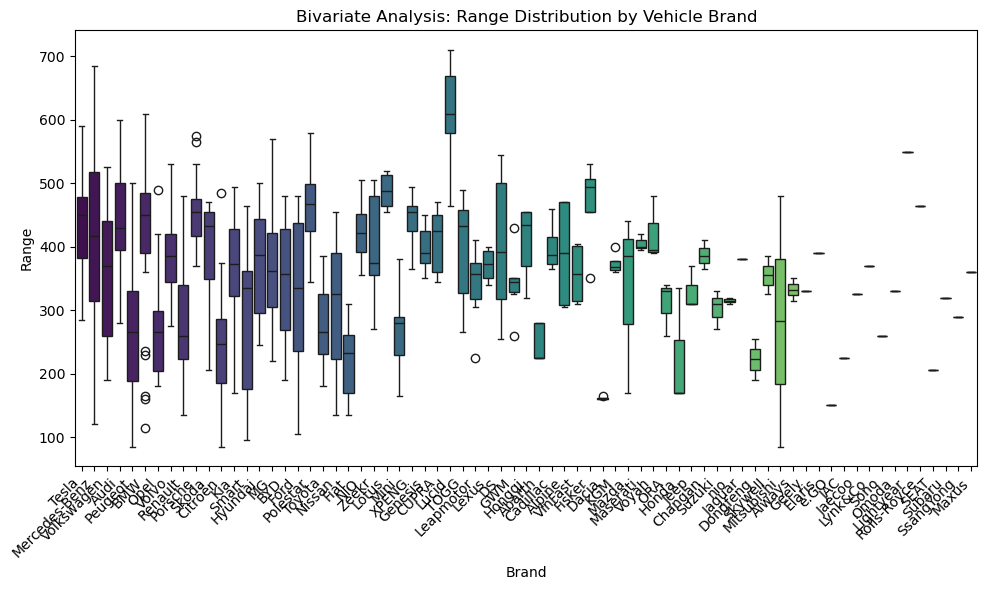

In [88]:
plt.figure(figsize=(10, 6))
# Plot the distribution of 'Range' grouped by the top 'Brand' categories
sns.boxplot(data=df1, x='Brand', y='Range', 
            order=df1['Brand'].value_counts().index, 
            palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Bivariate Analysis: Range Distribution by Vehicle Brand')
plt.tight_layout()
plt.show()

### Multivariate Analysis

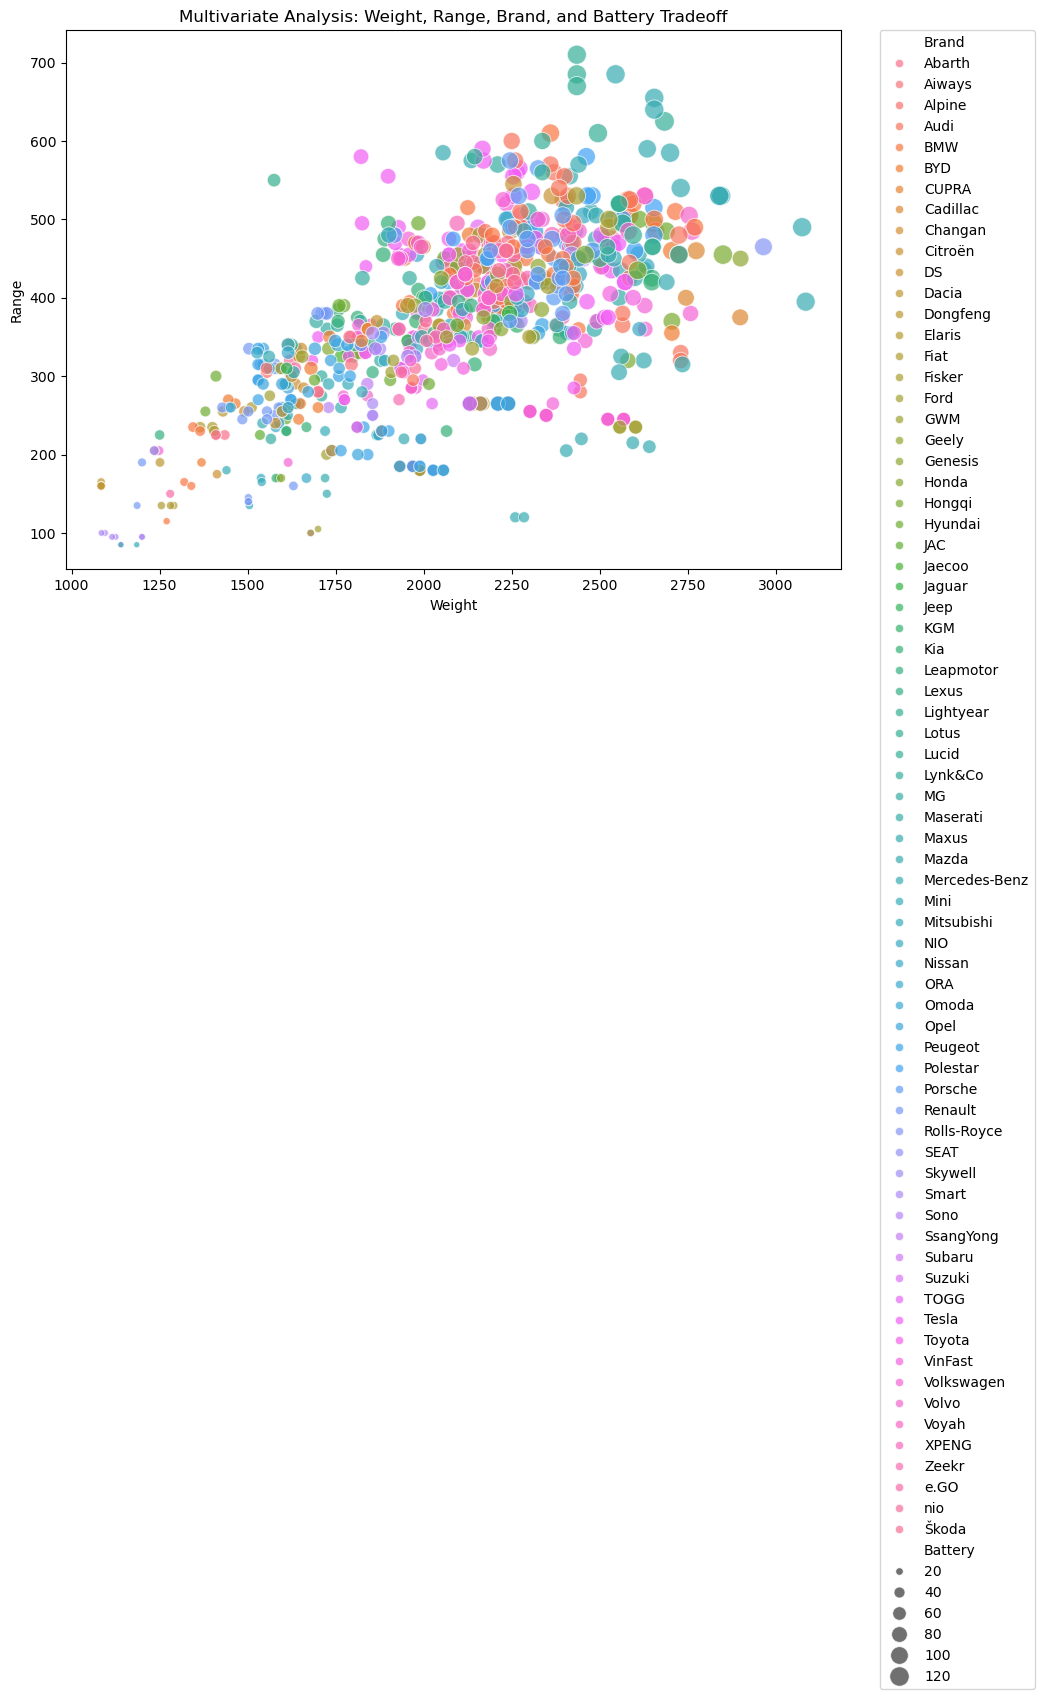

In [89]:
plt.figure(figsize=(10, 7))

# Create a scatter plot of Weight vs Range, with 'Brand' determining the color (Hue)
ax = sns.scatterplot(data=df1, 
                     x="Weight", 
                     y="Range", 
                     hue="Brand", 
                     size="Battery", 
                     sizes=(20, 200),
                     alpha=0.7)

plt.title("Multivariate Analysis: Weight, Range, Brand, and Battery Tradeoff")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

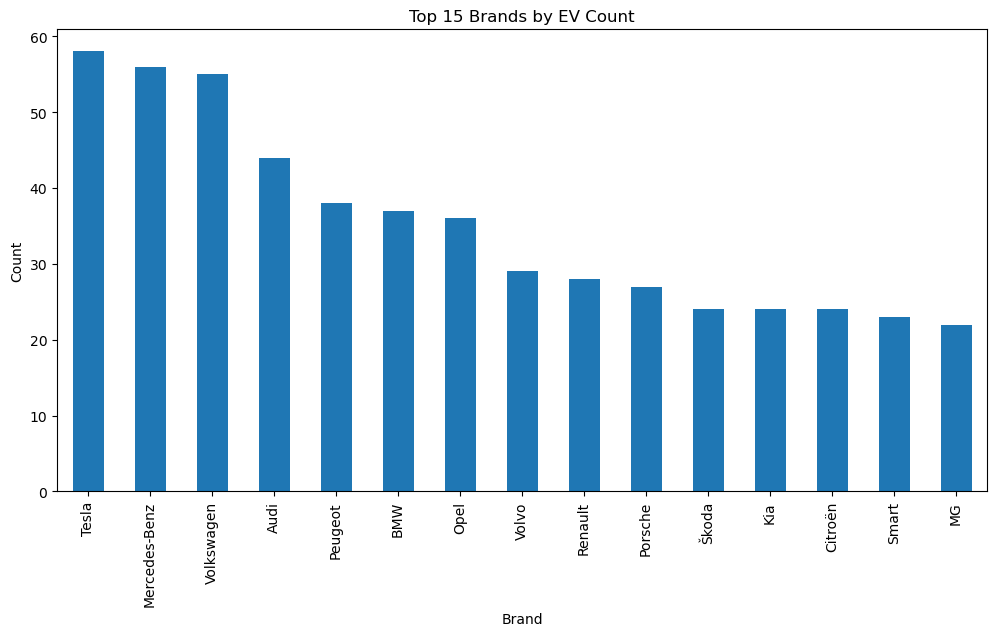

In [53]:
plt.figure(figsize=(12,6))
df1["Brand"].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Brands by EV Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

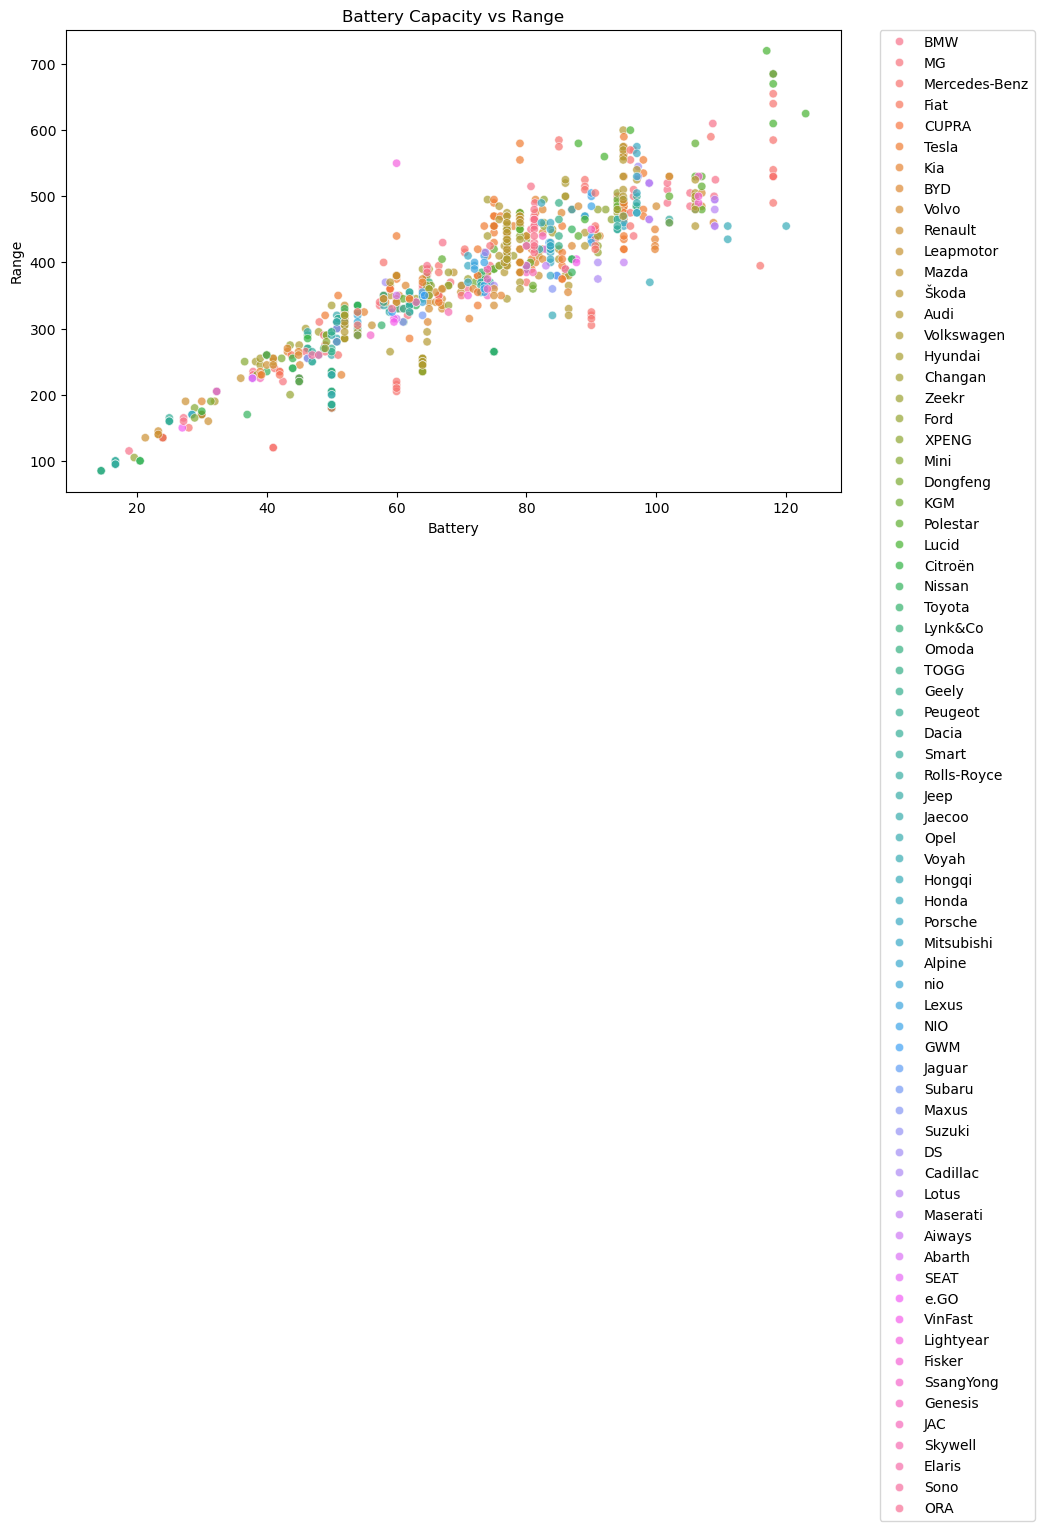

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Battery", y="Range", hue="Brand", alpha=0.7)

plt.title("Battery Capacity vs Range")
plt.xlabel("Battery")
plt.ylabel("Range")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

In [72]:
df1.nsmallest(10, '0-100')[["Model Name", "0-100"]]

,Model Name,0-100
270,ID.3 1st,1.0
350,ID.4 1st,1.0
783,Avenger Electric 1st Edition,1.0
244,Air Sapphire,2.0
583,Taycan Turbo GT Weissach,2.2
510,Taycan Turbo GT,2.3
59,Model S Plaid,2.4
89,Model S Plaid,2.4
738,Taycan Turbo S Sport Turismo,2.4
370,e-tron GT RS performance,2.5


In [50]:
df1.nsmallest(10, 'Price/range')[["Model", "Brand", "Price/range"]]


,Model,Brand,Price/range
500,Lightyear0Lightyear 0,Unknown,0.0
34,BMWiX1 xDrive30BMW iX1 xDrive30,Bmw,1.0
96,BMWiX1 eDrive20BMW iX1 eDrive20,Bmw,1.0
165,Hondae:Ny1Honda e:Ny1,Unknown,1.0
182,Zeekr001 Performance AWDZeekr 001 Performance AWD,Unknown,1.0
247,Zeekr001 Long Range RWDZeekr 001 Long Range RWD,Unknown,1.0
261,Smart#1 Pro+Smart #1 Pro+,Smart,1.0
293,Smart#1 BrabusSmart #1 Brabus,Smart,1.0
503,Smart#1 PremiumSmart #1 Premium,Smart,1.0
554,Zeekr001 Privilege AWDZeekr 001 Privilege AWD,Unknown,1.0


# EDA ADV

### 1. Brand Performance Ranking (Average Specs)

In [90]:
brand_perf = df1.groupby("Brand")[["Range", "Battery", "Fastcharge", "Price/range"]].mean().sort_values("Range", ascending=False)
brand_perf.head(10)

,Range,Battery,Fastcharge,Price/range
Brand,,,,
Lucid,611.666667,106.555556,106.555556,183.277778
Lightyear,550.000000,60.000000,60.000000,0.000000
Lotus,487.000000,103.950000,103.950000,709.000000
Fisker,467.500000,97.625000,97.625000,736.250000
Rolls-Royce,465.000000,102.000000,102.000000,736.250000
Polestar,463.333333,89.055556,89.055556,2.888889
Porsche,452.962963,87.233333,87.233333,386.018519
Tesla,442.155172,80.593103,80.593103,336.913793
Audi,442.045455,85.359091,85.359091,109.534091


## 2. Top 10 Longest-Range EVs

In [91]:
df1.nlargest(10, "Range")[["Model Name", "Brand", "Range"]]

,Model Name,Brand,Range
83,Air Grand Touring,Lucid,710
36,EQS 450+,Mercedes-Benz,685
384,Air Dream Edition R,Lucid,685
704,Air Dream Edition P,Lucid,670
415,EQS 450 4MATIC,Mercedes-Benz,655
492,EQS 500 4MATIC,Mercedes-Benz,640
159,Gravity Grand Touring,Lucid,625
0,iX3 50 xDrive,BMW,610
244,Air Sapphire,Lucid,610
131,A6 Sportback e-tron performance,Audi,600


## 3. Top 10 Fastest Charging EVs

In [92]:
df1.nlargest(10, "Fastcharge")[["Model Name", "Brand", "Fastcharge"]]

,Model Name,Brand,Fastcharge
5,Born 150 kW - 58 kWh,CUPRA,136.5
8,Born 170 kW - 77 kWh,CUPRA,136.5
218,Born 170 kW - 79 kWh,CUPRA,136.5
388,Born 170 kW - 59 kWh,CUPRA,136.5
517,Born 150 kW - 59 kWh,CUPRA,136.5
587,e-Tourneo Custom L2 210 kW,Ford,136.5
655,e-Transporter Kombi L2 210 kW 64 kWh,Volkswagen,136.5
665,Born 170 kW - 58 kWh,CUPRA,136.5
697,e-Tourneo Custom L1 160 kW,Ford,136.5
735,e-Tourneo Custom L2 160 kW,Ford,136.5


## 4. Price Efficiency Leaderboard

In [93]:
df1.nsmallest(10, "Price/range")[["Model Name", "Brand", "Price/range"]]

,Model Name,Brand,Price/range
504,0Lightyear 0,Lightyear,0.0
31,iX1 xDrive30,BMW,1.0
101,iX1 eDrive20,BMW,1.0
174,e:Ny1,Honda,1.0
188,001 Performance AWD,Zeekr,1.0
253,001 Long Range RWD,Zeekr,1.0
263,#1 Pro+,Smart,1.0
293,#1 Brabus,Smart,1.0
478,#1 Premium,Smart,1.0
548,001 Privilege AWD,Zeekr,1.0


## 5. Correlation Pairplot

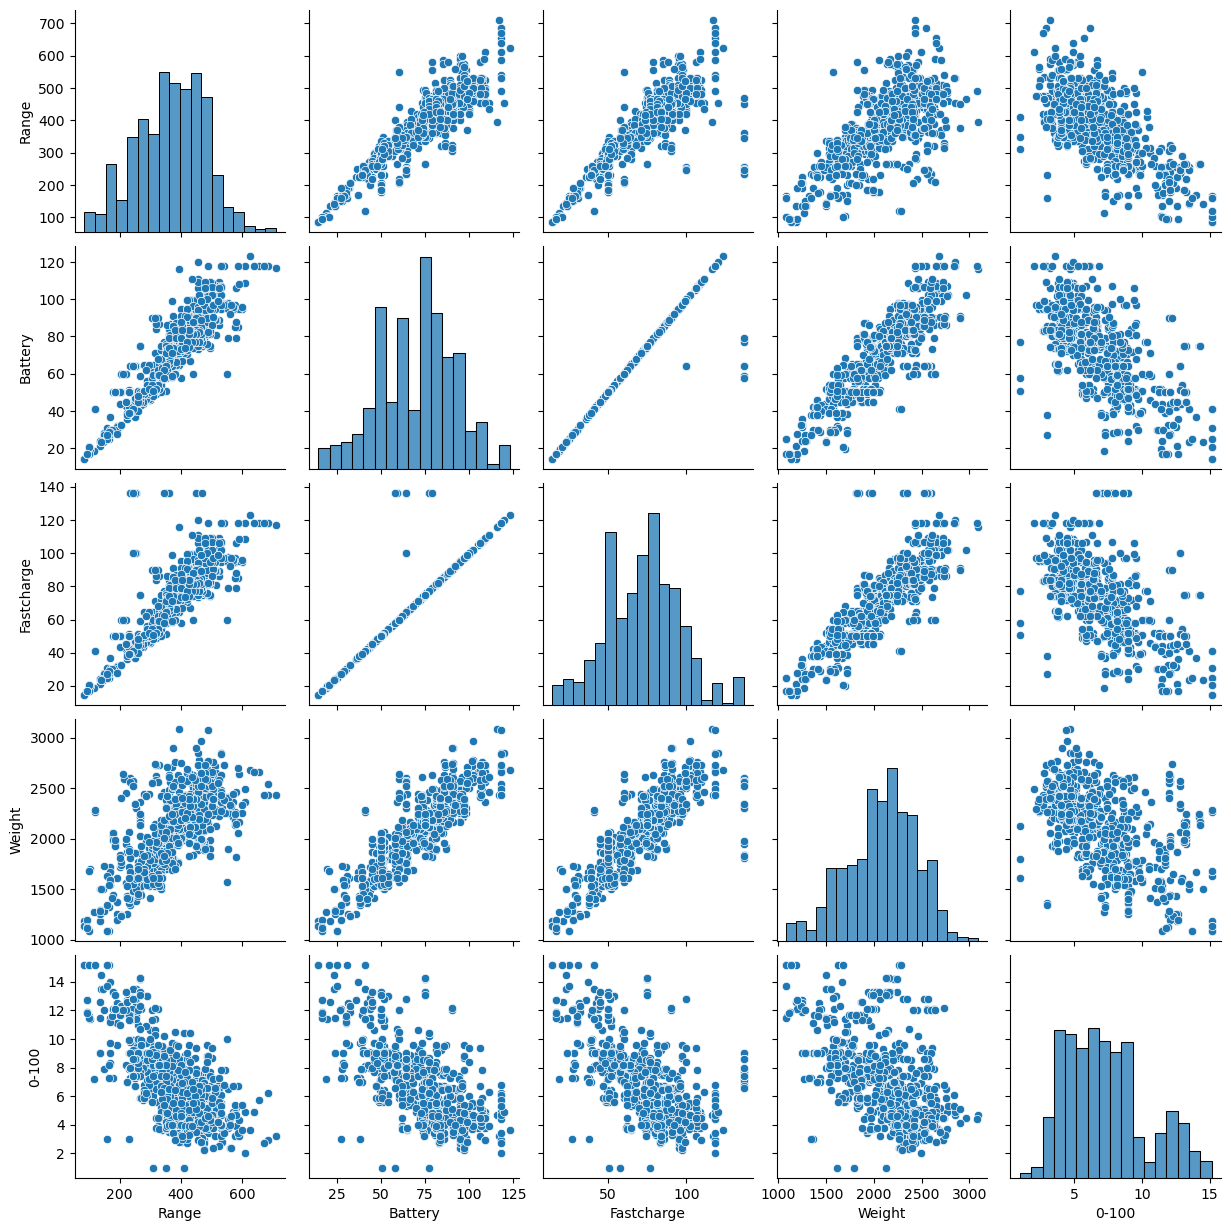

In [63]:
sns.pairplot(df1[["Range", "Battery", "Fastcharge", "Weight", "0-100"]])
plt.show()

In [ ]:
## 6. Weight vs Range Trade-Off

AttributeError: 'NoneType' object has no attribute 'remove'

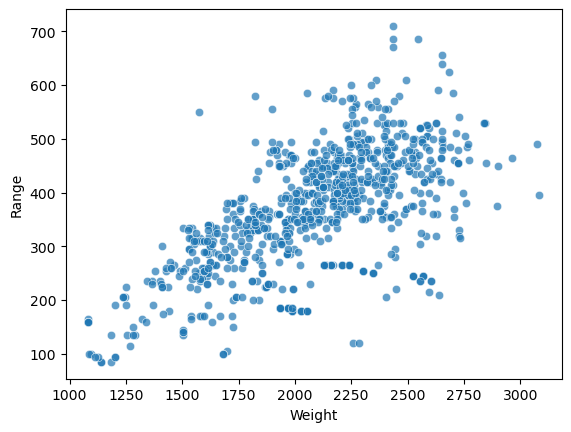

In [94]:
ax = sns.scatterplot(data=df1, x="Weight", y="Range", alpha=0.7)
ax.get_legend().remove()
plt.title("Weight vs Range Tradeoff"); plt.tight_layout(); plt.show()

In [ ]:
## 7. Battery vs Acceleration

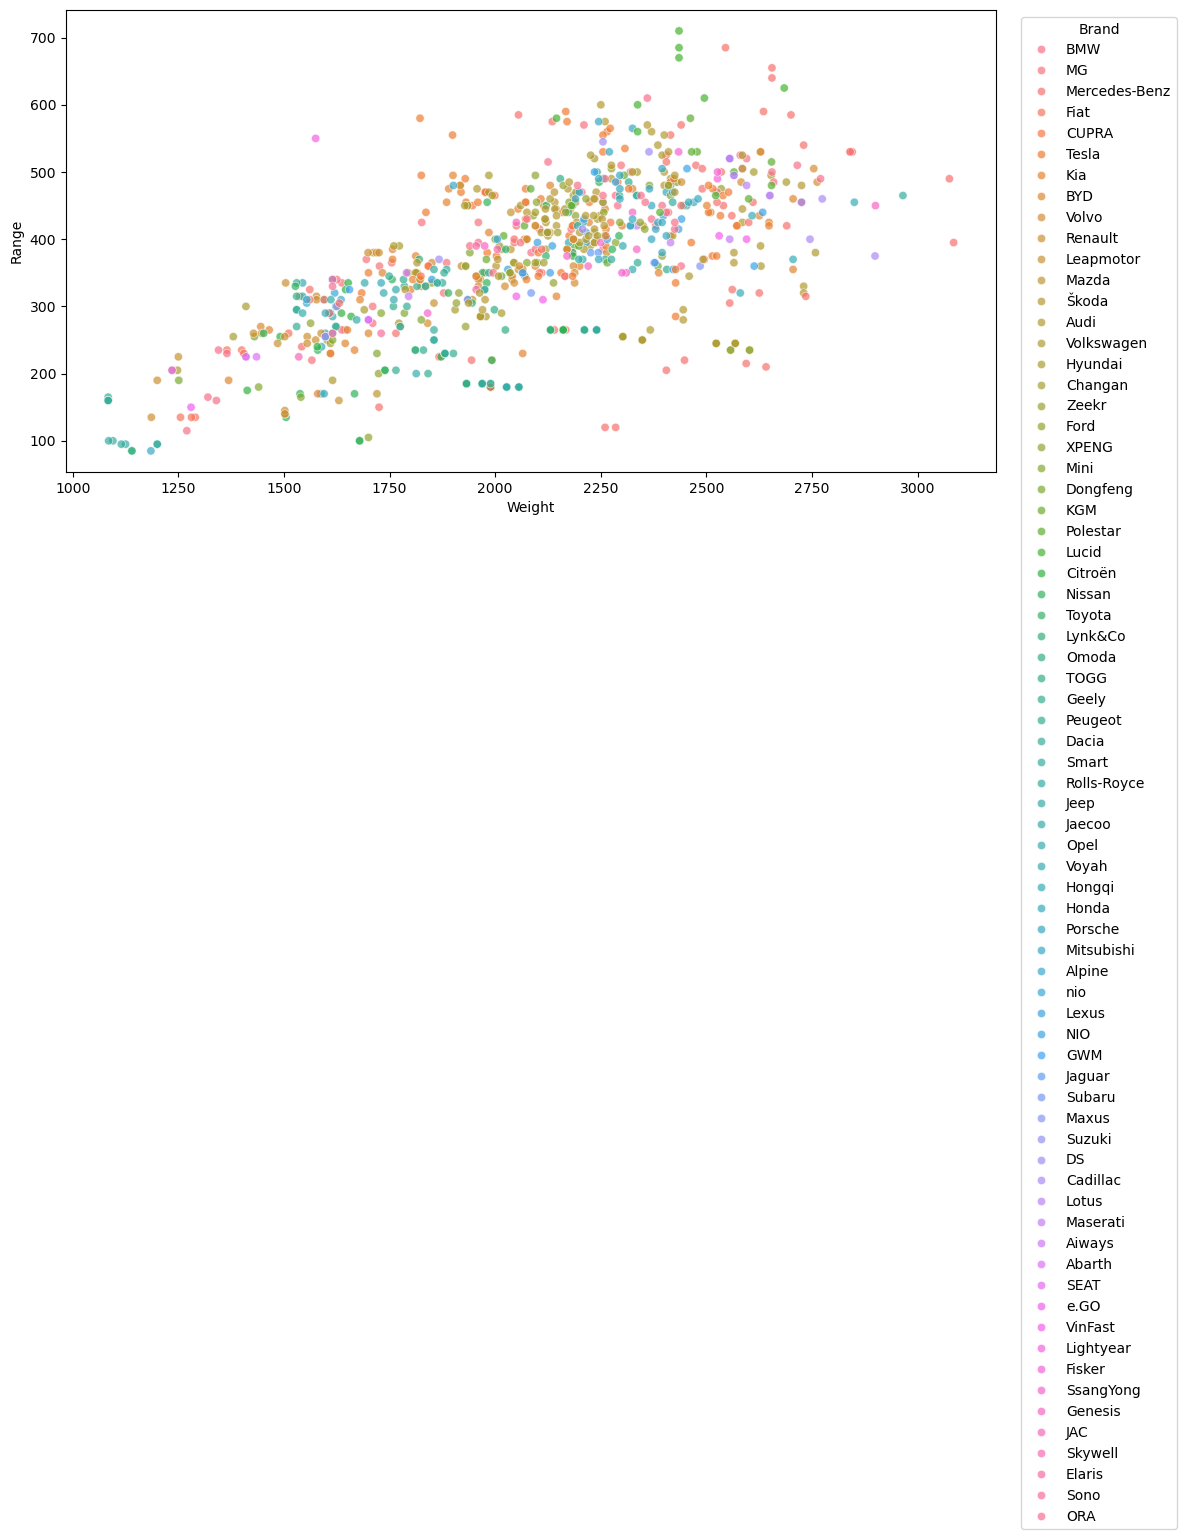

In [65]:
top = df1['Brand'].value_counts().head(12).index
d2 = df1.assign(Brand=df1['Brand'].where(df1['Brand'].isin(top), 'Other'))

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df1, x="Weight", y="Range", hue="Brand", alpha=0.7, ax=ax)
ax.legend(title="Brand", loc='upper left', bbox_to_anchor=(1.02,1))
plt.tight_layout(); plt.show()

In [72]:
## 8. Range Distribution by Brand

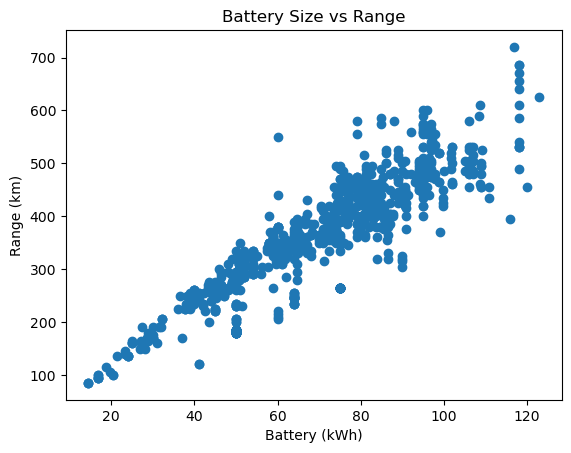

In [68]:
plt.scatter(df["Battery"], df["Range"])
plt.xlabel("Battery (kWh)")
plt.ylabel("Range (km)")
plt.title("Battery Size vs Range")
plt.show()

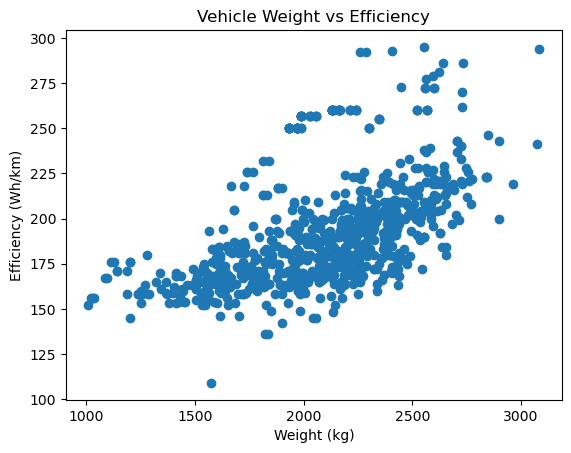

In [70]:
plt.scatter(df["Weight"], df["Efficiency"])
plt.xlabel("Weight (kg)")
plt.ylabel("Efficiency (Wh/km)")
plt.title("Vehicle Weight vs Efficiency")
plt.show()

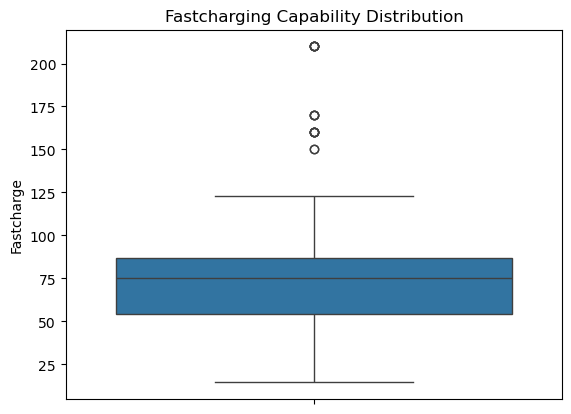

In [95]:
sns.boxplot(df["Fastcharge"])
plt.title("Fastcharging Capability Distribution")
plt.show()

### Which brands offer the best value in terms of range for the price?

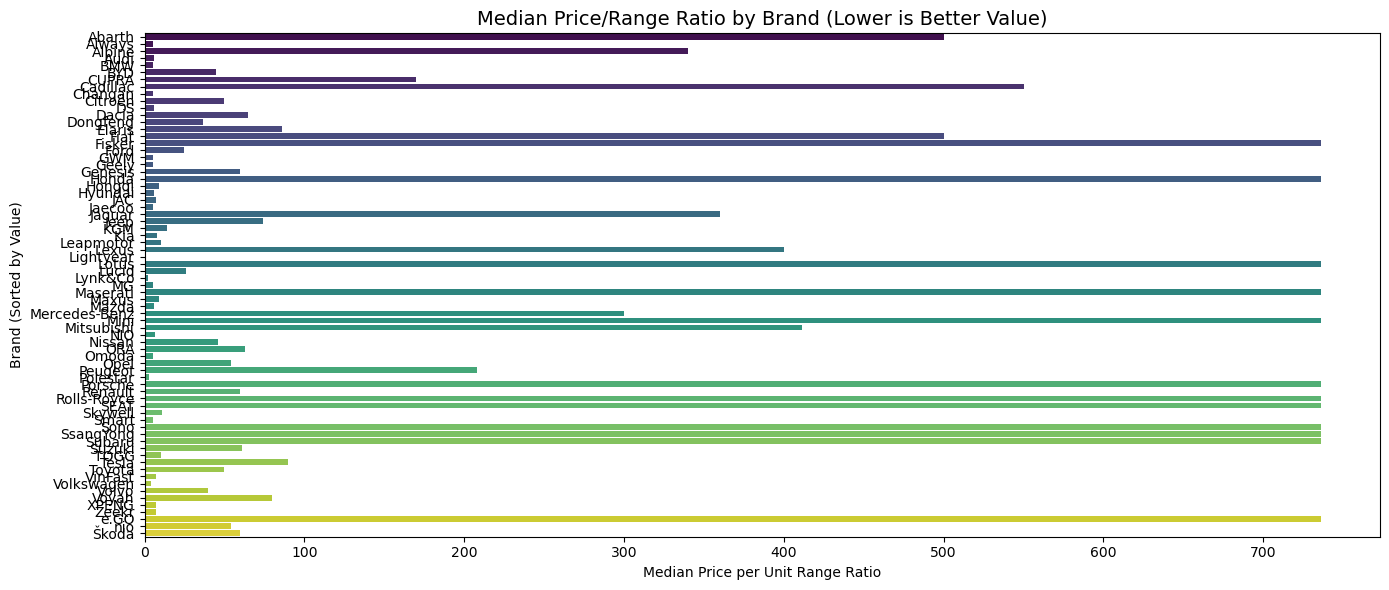

Top 5 Brands by Price/Range Value (Lowest Ratio is Best):
| Brand      |   Price/range |
|:-----------|--------------:|
| Lightyear  |             0 |
| Lynk&Co    |             2 |
| Polestar   |             3 |
| Volkswagen |             4 |
| MG         |             5 |


In [98]:
# 1. Ensure the Price/range metric is ready
# (Assuming 'Price/range' is already in your df1, if not, create it first)
# df1['Price_Range_Ratio'] = df1['Price'] / df1['Range'] 

# 2. Group by 'Brand' and calculate the median of the 'Price/range' ratio
# We use the median because it's less affected by any remaining outliers.
brand_value = df1.groupby('Brand')['Price/range'].median().reset_index()

# 3. Sort the results to find the best (lowest ratio) and worst (highest ratio)
brand_value_sorted = brand_value.sort_values(by='Price/range', ascending=True)

# 4. Visualize the results
plt.figure(figsize=(14, 6))
sns.barplot(
    data=brand_value_sorted, 
    x='Price/range', 
    y='Brand', 
    palette='viridis'
)
plt.title('Median Price/Range Ratio by Brand (Lower is Better Value)', fontsize=14)
plt.xlabel('Median Price per Unit Range Ratio')
plt.ylabel('Brand (Sorted by Value)')
plt.tight_layout()
plt.show()

# Print the top 5 brands for value
print("Top 5 Brands by Price/Range Value (Lowest Ratio is Best):")
print(brand_value_sorted.head(5).to_markdown(index=False))

### What is the primary technical tradeoff between Weight and Range, and how do different brands fit into this relationship?

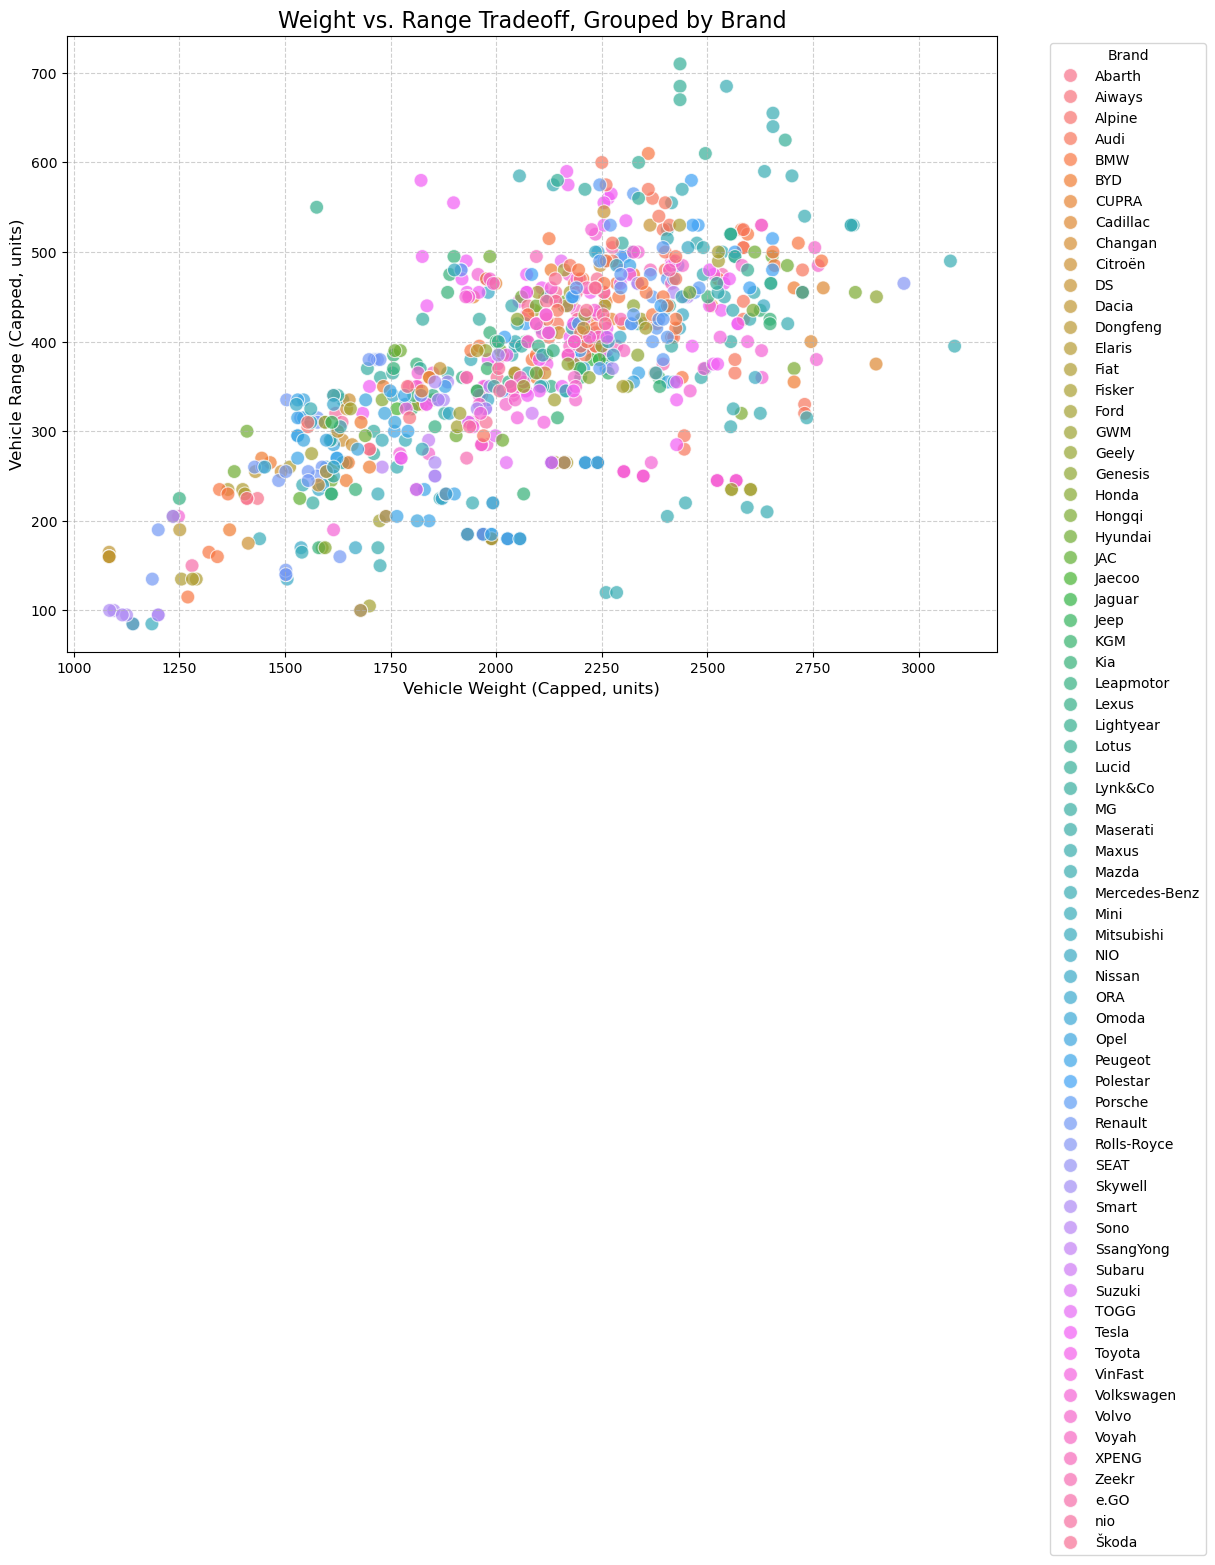


Interpretation:
Look for a general downward trend: heavier cars (high X) tend to have lower range (low Y).
Clusters of the same color (Brand) show their design philosophy (e.g., one brand might cluster in the low-weight, medium-range area).


In [99]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=df1, 
    x="Weight", 
    y="Range", 
    hue="Brand",  # Color by Brand
    alpha=0.7, 
    s=100  # Adjust size of points for visibility
)

plt.title("Weight vs. Range Tradeoff, Grouped by Brand", fontsize=16)
plt.xlabel("Vehicle Weight (Capped, units)", fontsize=12)
plt.ylabel("Vehicle Range (Capped, units)", fontsize=12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

print("\nInterpretation:")
print("Look for a general downward trend: heavier cars (high X) tend to have lower range (low Y).")
print("Clusters of the same color (Brand) show their design philosophy (e.g., one brand might cluster in the low-weight, medium-range area).")

### Which vehicles are the most and least efficient overall, based on Range per unit Battery?

In [101]:
efficiency_col = 'Range_Per_kWh' 

# 1. Find the top 3 most efficient vehicles (highest Range_Per_kWh)
most_efficient = df1.sort_values(by=efficiency_col, ascending=False).head(3)

# 2. Find the bottom 3 least efficient vehicles (lowest Range_Per_kWh)
least_efficient = df1.sort_values(by=efficiency_col, ascending=True).head(3)

# 3. Print the results, showing Brand, Model, and the key metric
print("🥇 Top 3 Most Efficient EVs (Highest Range_Per_kWh):")
print(most_efficient[['Brand', 'Model Name', efficiency_col, 'Range', 'Battery']].to_markdown(index=False))

print("\n🥉 Bottom 3 Least Efficient EVs (Lowest Range_Per_kWh):")
print(least_efficient[['Brand', 'Model Name', efficiency_col, 'Range', 'Battery']].to_markdown(index=False))

🥇 Top 3 Most Efficient EVs (Highest Range_Per_kWh):
| Brand     | Model Name             |   Range_Per_kWh |   Range |   Battery |
|:----------|:-----------------------|----------------:|--------:|----------:|
| Lightyear | 0Lightyear 0           |         9.16667 |     550 |        60 |
| Tesla     | Model 3 Long Range RWD |         7.34177 |     580 |        79 |
| Tesla     | Model 3 RWD            |         7.33333 |     440 |        60 |

🥉 Bottom 3 Least Efficient EVs (Lowest Range_Per_kWh):
| Brand         | Model Name                     |   Range_Per_kWh |   Range |   Battery |
|:--------------|:-------------------------------|----------------:|--------:|----------:|
| Mercedes-Benz | eVito Tourer Long 41 kWh       |         2.92683 |     120 |        41 |
| Mercedes-Benz | eVito Tourer Extra-Long 41 kWh |         2.92683 |     120 |        41 |
| Mercedes-Benz | eVito Tourer Extra-Long 90 kWh |         3.38889 |     305 |        90 |
